In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [71]:
import mlflow
import tensorflow as tf



In [72]:
data = pd.read_csv(r'D:\studydata\machine bild learn\LSTM\archive\DailyDelhiClimateTrain.csv')

In [73]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [74]:

data = data.drop(data.index[-1])

data=data.drop(columns=['date'])


In [75]:
data.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

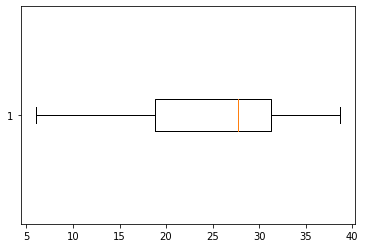

In [76]:
plt.boxplot(data['meantemp'],vert=False)
plt.show()

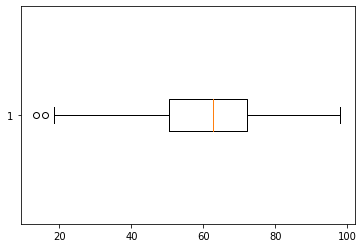

In [77]:
plt.boxplot(data['humidity'],vert=False)
plt.show()

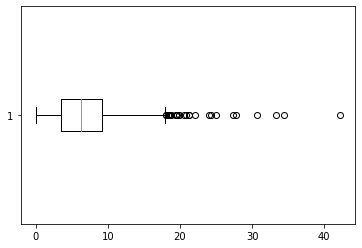

In [78]:
plt.boxplot(data['wind_speed'], vert=False)
plt.show()

In [79]:
data['wind_speed'].describe()

count    1461.000000
mean        6.806865
std         4.559688
min         0.000000
25%         3.475000
50%         6.250000
75%         9.250000
max        42.220000
Name: wind_speed, dtype: float64

In [80]:
median = data.loc[data['wind_speed']<15, 'wind_speed'].median()
print(median)
data.loc[data['wind_speed']<1,'wind_speed'] = np.nan
data.loc[data['wind_speed']>15,'wind_speed'] = np.nan
data['wind_speed'].fillna(median,inplace=True)
data['wind_speed']

5.875000000000001


0       5.875000
1       2.980000
2       4.633333
3       1.233333
4       3.700000
          ...   
1456    8.335000
1457    3.547826
1458    6.000000
1459    6.266667
1460    7.325000
Name: wind_speed, Length: 1461, dtype: float64

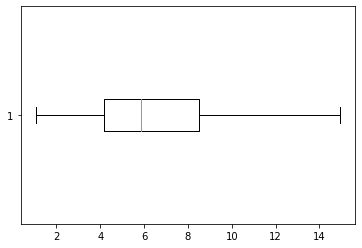

In [81]:
plt.boxplot(data['wind_speed'],vert=False)
plt.show()

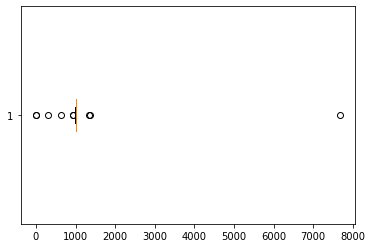

In [82]:
plt.boxplot(data['meanpressure'], vert=False)
plt.show()

In [83]:
data['meanpressure'].describe()

count    1461.000000
mean     1011.101197
std       180.293335
min        -3.041667
25%      1001.571429
50%      1008.555556
75%      1014.937500
max      7679.333333
Name: meanpressure, dtype: float64

In [84]:
median1 = data.loc[data['meanpressure']<1050, 'meanpressure'].median()
data.loc[data['meanpressure'] > 1050 , 'meanpressure'] = np.nan #atmospheric pressure usually lies between 760 and 1050 atm
data.loc[data['meanpressure'] < 760 , 'meanpressure'] = np.nan
data['meanpressure'].fillna(median1,inplace=True)

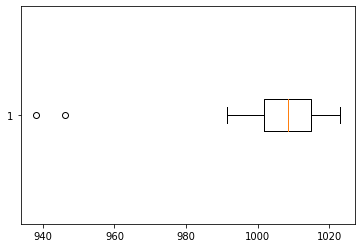

In [85]:
#Boxplot after replacing necessary outliers from meanpressure
plt.boxplot(data['meanpressure'], vert=False)
plt.show()

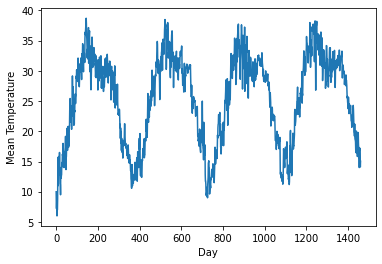

In [86]:
plt.plot(data['meantemp'])
plt.xlabel('Day')
plt.ylabel('Mean Temperature')
plt.show()

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler2=MinMaxScaler()
scaler3=MinMaxScaler()
scaler4=MinMaxScaler()

meantemp_scaled = scaler.fit_transform(data[['meantemp']])
humidity_scaled = scaler2.fit_transform(data[['humidity']])
windspeed_scaled = scaler3.fit_transform(data[['wind_speed']])
meanpressure_scaled = scaler4.fit_transform(data[['meanpressure']])

In [88]:
print(len(data['meantemp']))
print(len(data['humidity']))
print(len(data['wind_speed']))
print(len(data['meanpressure']))

1461
1461
1461
1461


In [89]:
X_scaled = np.concatenate((meantemp_scaled, humidity_scaled, windspeed_scaled, meanpressure_scaled), axis=1)
X_scaled.shape

(1461, 4)

In [90]:
x=[]
print(range(X_scaled.shape[0]-30))
for i in range(X_scaled.shape[0]-30):
   
    row = X_scaled[i:i+31]
    
    x.append(row)

x=np.array(x)
print(x.shape)
print('-----------------')
X_train = x[:,:-1] #1st 30 values will be considered as x values
print(X_train.shape)
Y_train = x[:,-1,0] #last value will be considered as our y value
print(Y_train.shape)
X_train.shape ,Y_train.shape, X_train.ndim, Y_train.ndim

range(0, 1431)
(1431, 31, 4)
-----------------
(1431, 30, 4)
(1431,)


((1431, 30, 4), (1431,), 3, 1)

In [91]:
X_train = X_train.reshape(-1,4,30)


In [92]:

from tensorflow import keras


In [93]:
data_test = pd.read_csv(r'D:\studydata\machine bild learn\LSTM\archive\DailyDelhiClimateTest.csv')
new_data = pd.DataFrame()
new_data = (data.tail(30)).append(data_test)
new_data = new_data.drop(columns=['date'])
meantemp_scaled1 = scaler.fit_transform(new_data[['meantemp']])
humidity_scaled1 = scaler2.fit_transform(new_data[['humidity']])
windspeed_scaled1 = scaler3.fit_transform(new_data[['wind_speed']])
meanpressure_scaled1 = scaler4.fit_transform(new_data[['meanpressure']])
new_data_scaled = np.concatenate((meantemp_scaled1, humidity_scaled1, windspeed_scaled1, meanpressure_scaled1), axis=1)

In [94]:
x1=[]
for i in range(new_data_scaled.shape[0]-30):
    row = new_data_scaled[i:i+31]
    x1.append(row)
    
x1=np.array(x1)
X_test = x1[:,:-1]
Y_test = x1[:,-1,0]
X_test = X_test.reshape(-1,4,30)

In [95]:
mlflow.set_tracking_uri("http://127.0.0.1:5000") 
mlflow.set_experiment('http_metrics_test') 
with mlflow.start_run():
   model=Sequential()
   model.add(LSTM(100, input_shape=(4,30), return_sequences=True))
   model.add(LSTM(100, return_sequences=True, recurrent_dropout=0.2))
   model.add(LSTM(100, return_sequences=True, recurrent_dropout=0.2))
   model.add(LSTM(100, return_sequences=False, recurrent_dropout=0.2))
   model.add(Dense(1, activation='linear'))
   
   optimizer = keras.optimizers.Adam(learning_rate=0.001)
   
   model.compile(optimizer=optimizer, loss='mean_squared_error')
   batch_size=32
   epochs=20

   history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs)


   history_dict = history.history  # 获取训练的数据字典
   

   predictions = model.predict(X_test)
   predictions = scaler.inverse_transform(predictions) #converting the predictions to original scale again

   Y_test = Y_test.reshape(-1,1) #convert Y_test to same shape as predictions
   Y_test = scaler.inverse_transform(Y_test)
   r2_score_value  = r2_score(Y_test, predictions)
   mae = mean_absolute_error(Y_test, predictions)
   mse = mean_squared_error(Y_test, predictions)

   mlflow.log_metric("r2_score", r2_score_value)
   mlflow.log_metric("mae", mae)
   mlflow.log_metric("mse", mse)
   mlflow.log_param("epochs", epochs)

   mlflow.log_param("batch_size", batch_size)
mlflow.end_run()


Epoch 1/20
45/45 [==============================] - 3s 8ms/step - loss: 0.0771
Epoch 2/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 3/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 4/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0088
Epoch 5/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0085
Epoch 6/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0088
Epoch 7/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0076
Epoch 8/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 9/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0065
Epoch 10/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 11/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 12/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0053
Epoch 13/20
45/45 [==============================

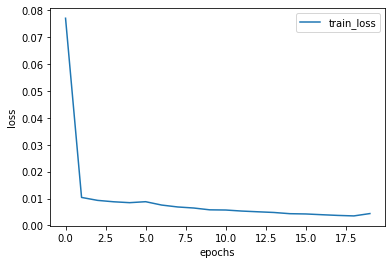

In [97]:
#（10）获取训练信息
history_dict = history.history  # 获取训练的数据字典
train_loss = history_dict['loss']  # 训练集损失
#accuracy = history_dict['accuracy']  # 验证集损失
 
#（11）绘制训练损失和验证损失
plt.figure()
plt.plot(range(20), train_loss, label='train_loss')  # 训练集损失
#plt.plot(range(5), accuracy, label='accuracy')  # 验证集损失
plt.legend()  # 显示标签
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## Reading Testing Data

In [ ]:
data_test = pd.read_csv(r'D:\studydata\machine bild learn\LSTM\archive\DailyDelhiClimateTest.csv')

In [ ]:
data_test.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
data_test.tail()

,date,meantemp,humidity,wind_speed,meanpressure
109,2017-04-20,34.500,27.500000,5.562500,998.625000
110,2017-04-21,34.250,39.375000,6.962500,999.875000
111,2017-04-22,32.900,40.900000,8.890000,1001.600000
112,2017-04-23,32.875,27.500000,9.962500,1002.125000
113,2017-04-24,32.000,27.142857,12.157143,1004.142857


In [ ]:
new_data = pd.DataFrame()
new_data = (data.tail(30)).append(data_test)
new_data = new_data.drop(columns=['date'])

In [ ]:
new_data.head()

,meantemp,humidity,wind_speed,meanpressure
1431,19.208333,75.875000,4.945833,1017.750000
1432,21.208333,52.166667,5.866667,1019.333333
1433,18.900000,55.250000,5.666667,1019.700000
1434,18.636364,56.590909,4.952381,1017.045455
1435,18.538462,69.923077,2.503846,1017.961538


In [ ]:
new_data.shape

(144, 4)

In [ ]:
meantemp_scaled1 = scaler.fit_transform(new_data[['meantemp']])
humidity_scaled1 = scaler2.fit_transform(new_data[['humidity']])
windspeed_scaled1 = scaler3.fit_transform(new_data[['wind_speed']])
meanpressure_scaled1 = scaler4.fit_transform(new_data[['meanpressure']])

In [ ]:
new_data_scaled = np.concatenate((meantemp_scaled1, humidity_scaled1, windspeed_scaled1, meanpressure_scaled1), axis=1)

In [ ]:
X_test.shape ,Y_test.shape, X_test.ndim, Y_test.ndim


((114, 4, 30), (114, 1), 3, 2)

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) #converting the predictions to original scale again

Y_test = Y_test.reshape(-1,1) #convert Y_test to same shape as predictions
Y_test = scaler.inverse_transform(Y_test)

In [ ]:
#first 10 actual values
Y_test[:10]

array([[384.95652174],
       [445.75      ],
       [413.11111111],
       [450.45      ],
       [443.13888889],
       [464.97727273],
       [356.64583333],
       [379.57894737],
       [353.42857143],
       [295.61111111]])

In [ ]:
#first 10 predicted values
predictions[:10]

array([[15.005445],
       [17.551006],
       [18.674063],
       [17.591904],
       [18.74385 ],
       [17.133913],
       [18.226442],
       [16.305058],
       [17.917673],
       [16.77564 ]], dtype=float32)

In [ ]:
#Coefficient of Determination
r2_score = r2_score(Y_test, predictions)
r2_score

TypeError: 'numpy.float64' object is not callable

In [ ]:
#Mean Absolute Error 
mae = mean_absolute_error(Y_test, predictions)
mae

1.747156027223421

In [ ]:
#Root Mean Square Error
mse = mean_squared_error(Y_test, predictions)
np.sqrt(mse)

2.142085762752745

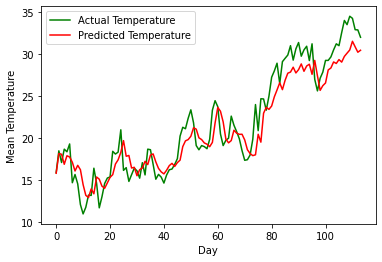

In [ ]:
plt.plot(Y_test, label='Actual Temperature', color='green')
plt.plot(predictions, label='Predicted Temperature', color='red')
plt.legend(loc='best')
plt.xlabel('Day')
plt.ylabel('Mean Temperature')
plt.show()